In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import precision_recall_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [3]:
# This file was excluded from git repo due to file size
# You can reproduce this file through FeatureEngineering().transform()
df = pd.read_csv('../final-fe.csv')

## Total Acceleration Analysis

I am using histogram to plot distribution for total acceleration (total_acceleration = sqrt(accel_x^2 + accel_y^2 + accel_z^2). It shows that not all total acceleration features are normally distributed, some of them has skewed distribution. For skewed distribution I will try to use log transformation (log1p) to transform to normaly distributted and analyze the result after modeling process.

/Users/bramantyoadrian/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


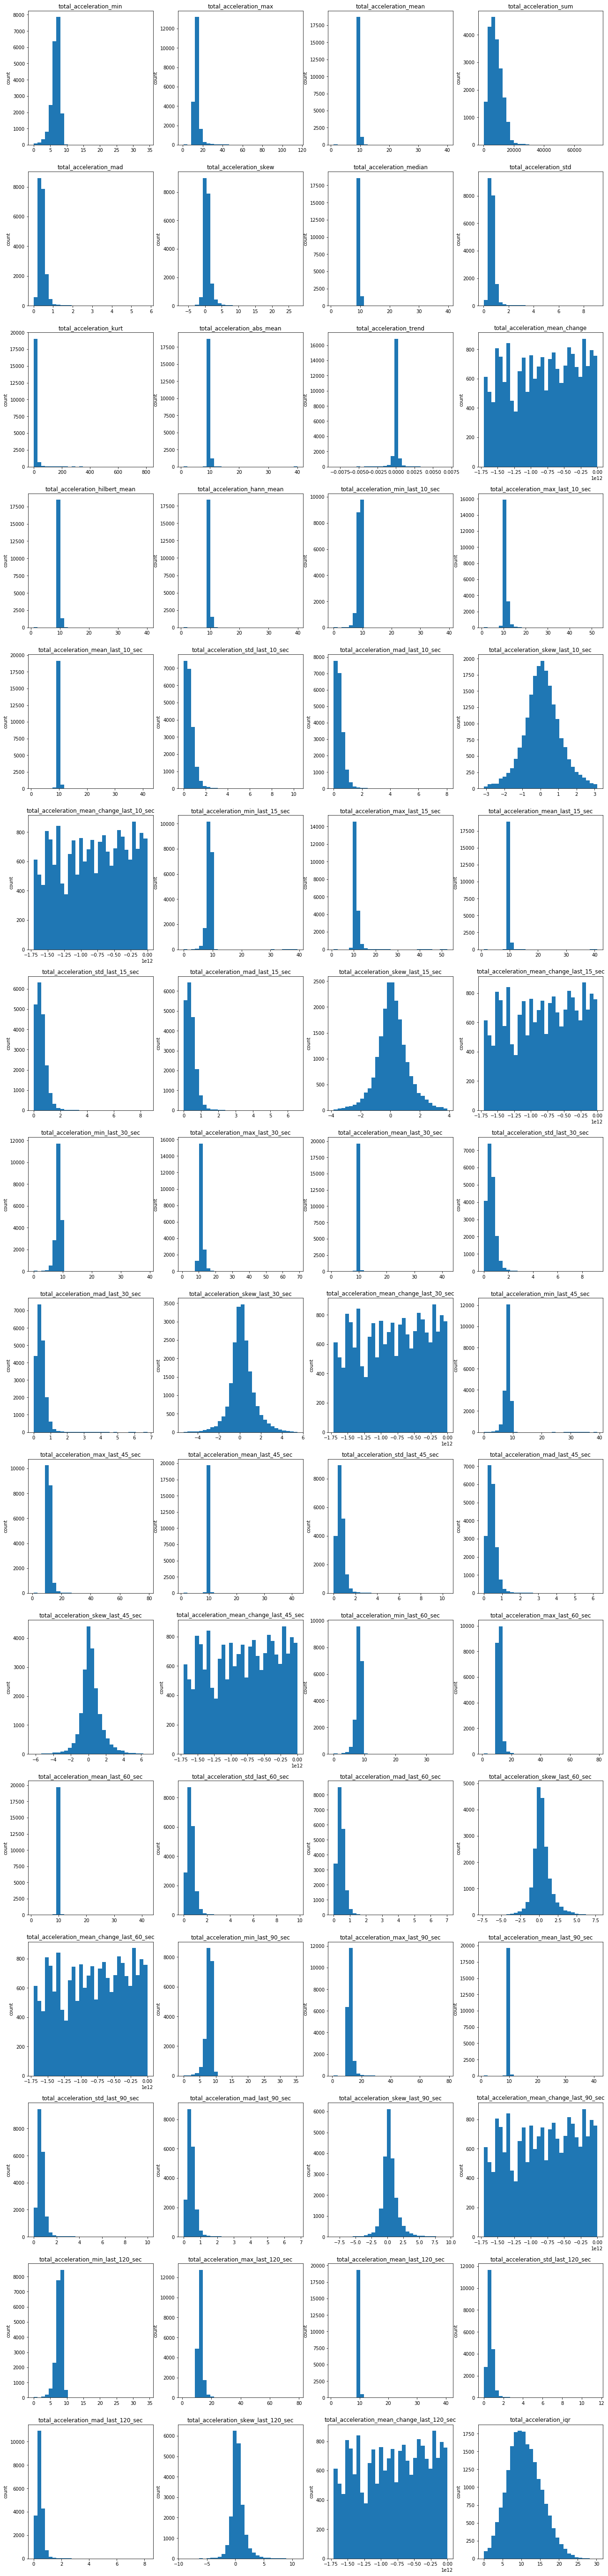

In [100]:
plt.figure(figsize=(22, 100))

total_acc_col = [x for x in df.columns if x.startswith('total_acc')] 
for i, x in enumerate(total_acc_col):
    plt.subplot(16, 4, i + 1)
    plt.title(x)
    x = df[x].values
    plt.hist(x, normed=False, bins=30)
    plt.ylabel('count');


## Total Gyro Analysis

I am using histogram to plot distribution for total gyro (total_gyro = sqrt(gyro_x^2 + gyro_y^2 + gyro_z^2). It shows that not all total gyro features are normally distributed, same as total acceleration above. Many of total gyro has zero values and I will try to exclude features that has many zeros value through feature selection using feature importance from model and retrain the model.

/Users/bramantyoadrian/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


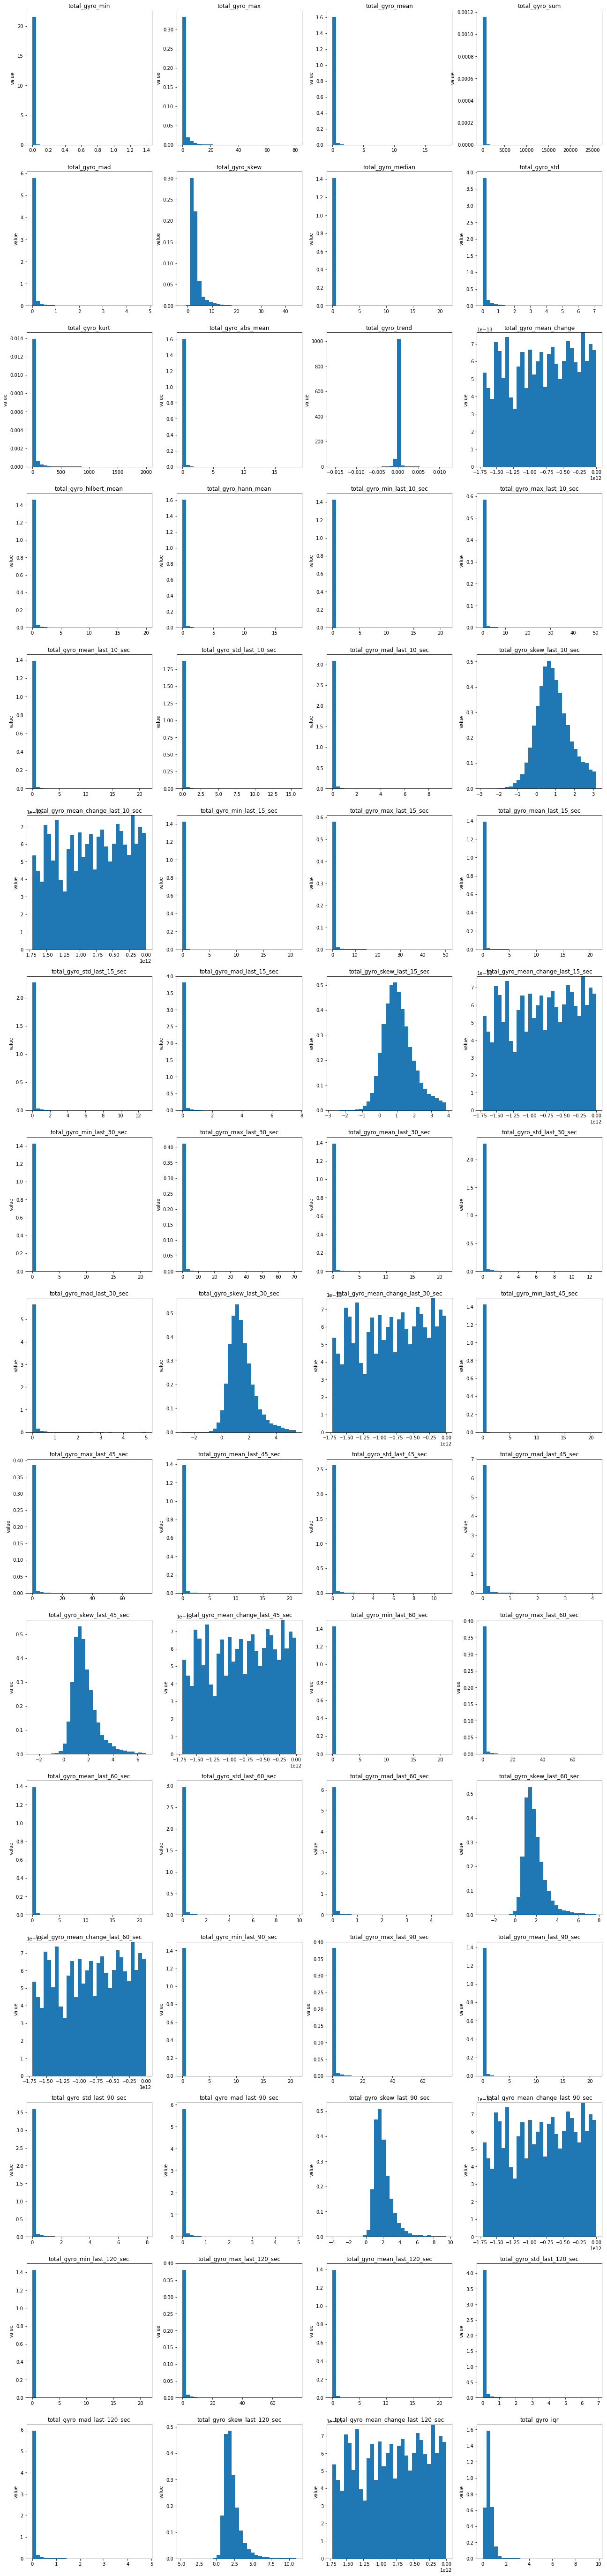

In [61]:
plt.figure(figsize=(22, 100))

total_acc_col = [x for x in df.columns if x.startswith('total_gyro')] 
for i, x in enumerate(total_acc_col):
    plt.subplot(16, 4, i + 1)
    plt.title(x)
    x = df[x].values
    plt.hist(x, normed=True, bins=30)
    plt.ylabel('value');


## Speed Analysis

/Users/bramantyoadrian/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


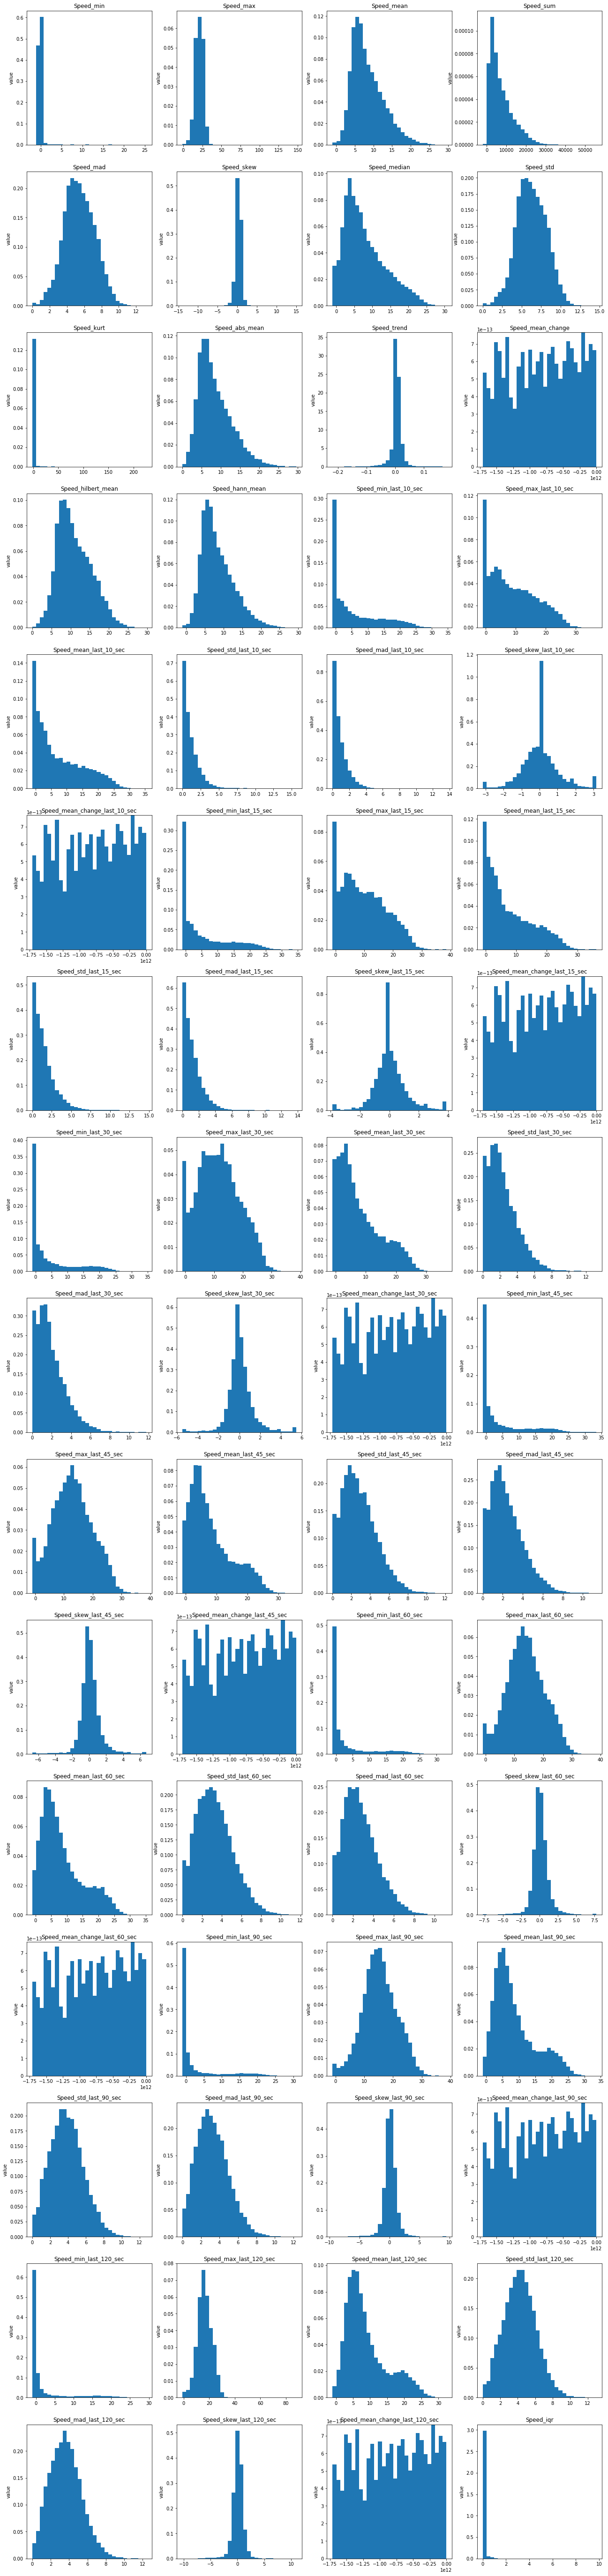

In [62]:
plt.figure(figsize=(22, 100))

total_acc_col = [x for x in df.columns if x.startswith('Speed')] 
for i, x in enumerate(total_acc_col):
    plt.subplot(16, 4, i + 1)
    plt.title(x)
    x = df[x].values
    plt.hist(x, normed=True, bins=30)
    plt.ylabel('value');


## Bearing Analysis

/Users/bramantyoadrian/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


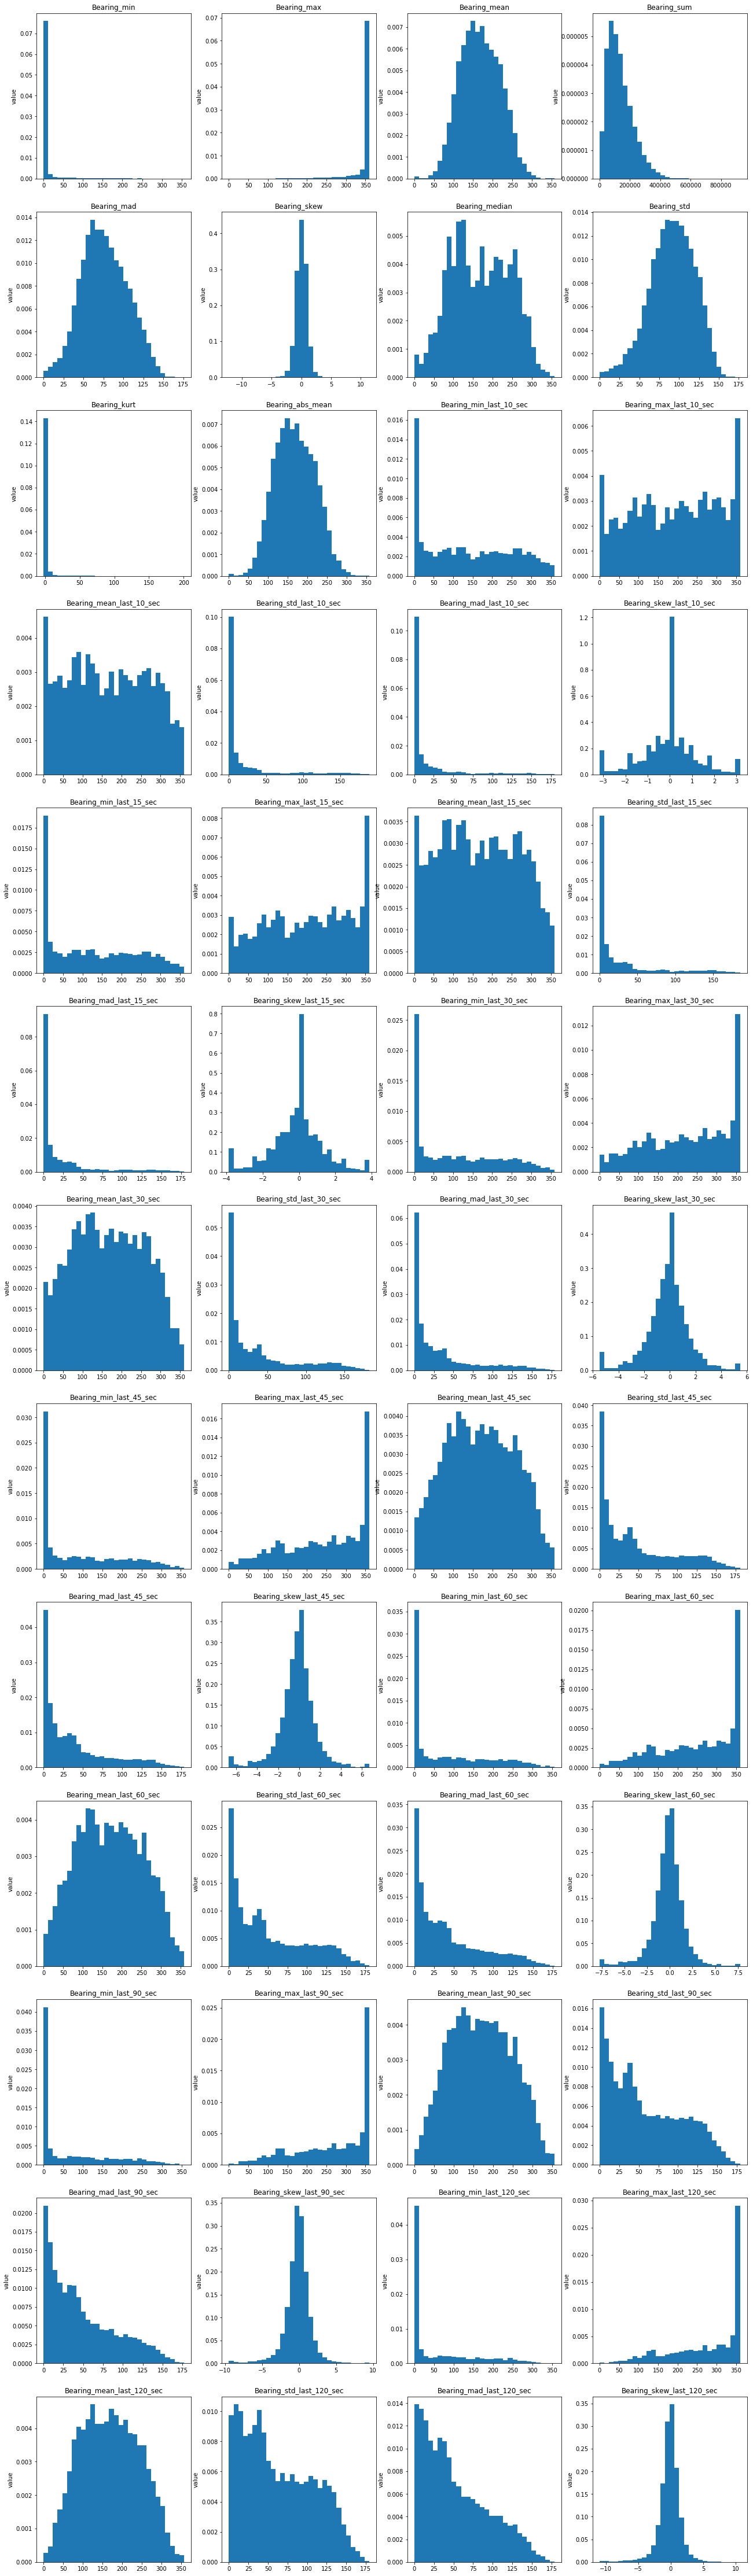

In [64]:
plt.figure(figsize=(22, 100))

total_acc_col = [x for x in df.columns if x.startswith('Bearing')] 
for i, x in enumerate(total_acc_col):
    plt.subplot(16, 4, i + 1)
    plt.title(x)
    x = df[x].values
    plt.hist(x, normed=True, bins=30)
    plt.ylabel('value');
